In [ ]:
import numpy as np
from pymatgen.core import Structure
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import json

# 数据集准备 

In [2]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgapTrain1.json", "r") as f:
    data_train = json.load(f)

In [3]:
structures = []
gaps = []

for item in data_train:
    structure = Structure.from_dict(item['structure'])
    gap = item['real_gap'] - item['bandgap']
    structures.append(structure)
    gaps.append(gap)

In [4]:
data_train

[{'structure': {'@module': 'pymatgen.core.structure',
   '@class': 'Structure',
   'charge': 0,
   'lattice': {'matrix': [[18.529572012330846,
      1.24694756e-08,
      6.2709044361e-06],
     [-4.795086209e-07, 6.521252982657631, 1.1054893964e-06],
     [3.81897325e-08, -1.02393447e-08, 6.245166844454914]],
    'pbc': [True, True, True],
    'a': 18.529572012331908,
    'b': 6.521252982657742,
    'c': 6.245166844454914,
    'alpha': 89.99999038110161,
    'beta': 89.99998025920198,
    'gamma': 90.000004174406,
    'volume': 754.6411478921391},
   'sites': [{'species': [{'element': 'H', 'occu': 1}],
     'abc': [0.234505343370995, 0.4999999999985824, 0.500000729998312],
     'xyz': [4.345283426609807, 3.26062648912405, 3.122590004494008],
     'label': 'H',
     'properties': {}},
    {'species': [{'element': 'H', 'occu': 1}],
     'abc': [0.5678386933709918, 0.4999999999985824, 0.500000729998312],
     'xyz': [10.521807739546231, 3.260626493280542, 3.1225920947955914],
     'label

In [5]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgap3Test.json", "r") as f:
    data_test = json.load(f)

In [6]:
structures_test = []
DFT_bandgaps = []

for item in data_test:
    structure = Structure.from_dict(item['structure'])
    DFT_bandgap = item['bandgap']
    structures_test.append(structure)
    DFT_bandgaps.append(DFT_bandgap)

In [7]:
DFT_bandgaps

[{'direct': True, 'energy': 1.6165000000000003, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.6435, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.9423, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.7110999999999998, 'transition': 'Z-Z'},
 {'direct': True, 'energy': 1.5245000000000002, 'transition': 'Z-Z'}]

In [8]:
DFT_bandgaps_test = []
for i in DFT_bandgaps:
    DFT_bandgaps_test.append(i['energy'])

In [9]:
DFT_bandgaps_test

[1.6165000000000003, 1.6435, 1.9423, 1.7110999999999998, 1.5245000000000002]

In [10]:
with open("/root/home/jupyter/DFT/bandgap/bandgap_json/DFT_bandgap2Test.json", "r") as f:
    data_test2 = json.load(f)

In [11]:
data_test2[0]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[12.787734833883398,
     4.6395439e-09,
     0.0001114544232935],
    [-3.044480052e-07, 13.01296343422229, 3.687073349e-07],
    [2.45370005896e-05, -2.9869465e-09, 6.518215051538841]],
   'pbc': [True, True, True],
   'a': 12.7877348343691,
   'b': 13.012963434222298,
   'c': 6.518215051585025,
   'alpha': 89.99999840285068,
   'beta': 89.99928494279463,
   'gamma': 90.00000131967583,
   'volume': 1084.6722174643057},
  'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.2353852677491624, 0.2499999999996913, 0.5000228908551582],
    'xyz': [3.010056580728901, 3.253240858150094, 3.259283060192158],
    'label': 'Cs',
    'properties': {}},
   {'species': [{'element': 'H', 'occu': 1}],
    'abc': [0.3483412571701052, 0.7500000000005033, 0.499995300304],
    'xyz': [4.454507668441863, 9.759722575795951, 3.2591159928446443],
    'label': 'H',
    'propert

In [12]:
structure_test2 = Structure.from_dict(data_test2[0]['structure'])
DFT_bandgap = data_test2[0]['bandgap']['energy']


In [13]:
structure_test2.formula

'Cs1 H15 Pb4 C3 I12 N6'

In [14]:
DFT_bandgap

1.5330999999999997

In [15]:
structures_test.append(structure_test2)

In [16]:
DFT_bandgaps_test.append(DFT_bandgap)

In [17]:
print(len(structures_test))
print(len(DFT_bandgaps_test))


6
6


In [18]:
real_gaps_test = [ 1.75, 2.14, 2.28, 1.83, 1.61,1.57] 

In [19]:
for i in structures_test:
    print(i.formula)

H22 Pb4 C4 I8 Br4 N6
H22 Pb4 C4 I2 Br10 N6
H22 Pb4 C4 Br12 N6
H22 Pb4 C4 I6 Br6 N6
H22 Pb4 C4 I10 Br2 N6
Cs1 H15 Pb4 C3 I12 N6


In [20]:
DFT_bandgaps_test

[1.6165000000000003,
 1.6435,
 1.9423,
 1.7110999999999998,
 1.5245000000000002,
 1.5330999999999997]

In [21]:
# 使用列表推导式计算对应位置元素的差值  
gaps_test = [real - DFT for real, DFT in zip(real_gaps_test, DFT_bandgaps_test)]  
  
print(gaps_test)  # 输出新列表，包含对应位置元素的差值

[0.13349999999999973, 0.49650000000000016, 0.3376999999999999, 0.11890000000000023, 0.08549999999999991, 0.03690000000000038]


In [22]:
len(gaps_test)

6

In [23]:
new_gaps = gaps+gaps_test
new_structures = structures + structures_test
print(len(new_gaps))
print(len(new_structures))

108
108


# 训练集和测试集拆分

In [24]:
import random  

# 首先创建一个包含所有索引的列表  
all_indices = list(range(len(new_structures)))  
  
# 随机打乱索引列表  
random.shuffle(all_indices)  
  
# 选择前90个索引作为训练集，剩下的18个索引作为测试集  
train_indices = all_indices[:90]  
test_indices = all_indices[90:]  
  
# 根据索引创建训练集和测试集的结构和带隙列表  
train_structures = [new_structures[i] for i in train_indices]  
train_gaps = [new_gaps[i] for i in train_indices]  
  
test_structures = [new_structures[i] for i in test_indices]  
test_gaps = [new_gaps[i] for i in test_indices]  
  
# 现在你可以使用 train_structures, train_gaps, test_structures, 和 test_gaps 进行后续的操作了

In [25]:
print(all_indices)

[9, 37, 65, 80, 38, 24, 10, 66, 44, 54, 50, 35, 23, 94, 87, 48, 2, 70, 18, 63, 90, 34, 91, 62, 68, 107, 5, 57, 16, 1, 73, 72, 39, 61, 26, 49, 17, 33, 8, 99, 52, 40, 27, 19, 29, 97, 69, 14, 71, 25, 36, 59, 102, 98, 21, 20, 46, 3, 100, 43, 95, 60, 92, 31, 103, 93, 45, 11, 85, 32, 88, 78, 106, 15, 47, 55, 53, 4, 30, 86, 42, 6, 79, 7, 28, 22, 51, 82, 83, 89, 77, 12, 56, 84, 105, 96, 41, 74, 76, 0, 75, 104, 101, 81, 13, 58, 67, 64]


# 模型训练

In [26]:
nfeat_bond = 10
r_cutoff = 8
gaussian_centers = np.linspace(0, r_cutoff+1, nfeat_bond)
gaussian_width = 0.5
graph_converter = CrystalGraph(cutoff=r_cutoff)
model = MEGNetModel(graph_converter=graph_converter, centers=gaussian_centers, width=gaussian_width)

2024-01-01 15:41:16.168297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 15:41:16.201045: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-01 15:41:16.201281: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [27]:
len(train_gaps)

90

In [28]:
len(train_structures)

90

In [29]:
model.train(train_structures, train_gaps, epochs=200)

Epoch 1/200


2024-01-01 15:41:40.281056: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fa5cd2f7a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-01 15:41:40.281091: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-01-01 15:41:40.286823: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-01 15:41:40.306201: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1704094900.390178   37410 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 27s 27s/step - loss: 0.1505
Epoch 2/200
1/1 [==============================] - 1s 820ms/step - loss: 0.1491
Epoch 3/200
1/1 [==============================] - 1s 812ms/step - loss: 0.1494
Epoch 4/200
1/1 [==============================] - 1s 813ms/step - loss: 0.1492
Epoch 5/200
1/1 [==============================] - 1s 813ms/step - loss: 0.1486
Epoch 6/200
1/1 [==============================] - 1s 816ms/step - loss: 0.1482
Epoch 7/200
1/1 [==============================] - 1s 816ms/step - loss: 0.1481
Epoch 8/200
1/1 [==============================] - 1s 814ms/step - loss: 0.1480
Epoch 9/200
1/1 [==============================] - 1s 815ms/step - loss: 0.1476
Epoch 10/200
1/1 [==============================] - 1s 807ms/step - loss: 0.1471
Epoch 11/200
1/1 [==============================] - 1s 804ms/step - loss: 0.1465
Epoch 12/200
1/1 [==============================] - 1s 813ms/step - loss: 0.1461
Epoch 13/200
1/1 [==============================] 

In [30]:
# 使用模型预测能带差
predictions_train = []
for structure in train_structures:
    prediction = model.predict_structure(structure)
    predictions_train.append(prediction)

In [31]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_train = np.sqrt(mean_squared_error(train_gaps, predictions_train))
mae_train = mean_absolute_error(train_gaps, predictions_train)
r2_train = r2_score(train_gaps, predictions_train)

In [32]:
print(r2_train)
print(mae_train)
print(rmse_train)

0.9655933955624839
0.054597298618721646
0.07168502471121342


In [33]:
all_indices[90:]

[77, 12, 56, 84, 105, 96, 41, 74, 76, 0, 75, 104, 101, 81, 13, 58, 67, 64]

In [34]:
len(all_indices[90:])

18

In [35]:
len(train_gaps)

90

In [36]:
len(predictions_train)

90

In [37]:
predictions_train

[array([0.13839898], dtype=float32),
 array([0.26167843], dtype=float32),
 array([0.1213195], dtype=float32),
 array([-0.43893674], dtype=float32),
 array([0.47832564], dtype=float32),
 array([0.13100983], dtype=float32),
 array([0.1376147], dtype=float32),
 array([0.10074123], dtype=float32),
 array([0.58479613], dtype=float32),
 array([-0.04340641], dtype=float32),
 array([0.66267073], dtype=float32),
 array([0.2512781], dtype=float32),
 array([0.09979492], dtype=float32),
 array([-0.52036554], dtype=float32),
 array([-0.57630444], dtype=float32),
 array([0.59188277], dtype=float32),
 array([0.13100235], dtype=float32),
 array([0.04144605], dtype=float32),
 array([-0.00547909], dtype=float32),
 array([0.12301687], dtype=float32),
 array([-0.66472125], dtype=float32),
 array([0.22211686], dtype=float32),
 array([-0.5471344], dtype=float32),
 array([0.11916099], dtype=float32),
 array([0.12112298], dtype=float32),
 array([-0.13213857], dtype=float32),
 array([0.08114643], dtype=float32

In [38]:
predictions_train_ = [pred[0].item() for pred in predictions_train]
predictions_train_

[0.13839897513389587,
 0.26167842745780945,
 0.1213194951415062,
 -0.4389367401599884,
 0.47832563519477844,
 0.13100983202457428,
 0.13761469721794128,
 0.10074122995138168,
 0.584796130657196,
 -0.0434064082801342,
 0.6626707315444946,
 0.2512781023979187,
 0.0997949168086052,
 -0.5203655362129211,
 -0.5763044357299805,
 0.5918827652931213,
 0.13100235164165497,
 0.04144604504108429,
 -0.00547909177839756,
 0.12301687151193619,
 -0.6647212505340576,
 0.2221168577671051,
 -0.5471343994140625,
 0.11916099488735199,
 0.12112297862768173,
 -0.13213856518268585,
 0.08114642649888992,
 0.0843634158372879,
 0.055524010211229324,
 0.31266459822654724,
 -0.0023110518231987953,
 0.005578836426138878,
 0.4365413784980774,
 0.09348788112401962,
 0.032413776963949203,
 0.6688974499702454,
 0.5621824860572815,
 0.19543074071407318,
 0.38320860266685486,
 -0.4975595772266388,
 0.6828820109367371,
 0.4775025546550751,
 0.1197318583726883,
 0.015581603161990643,
 0.1365170031785965,
 -0.6046574711799

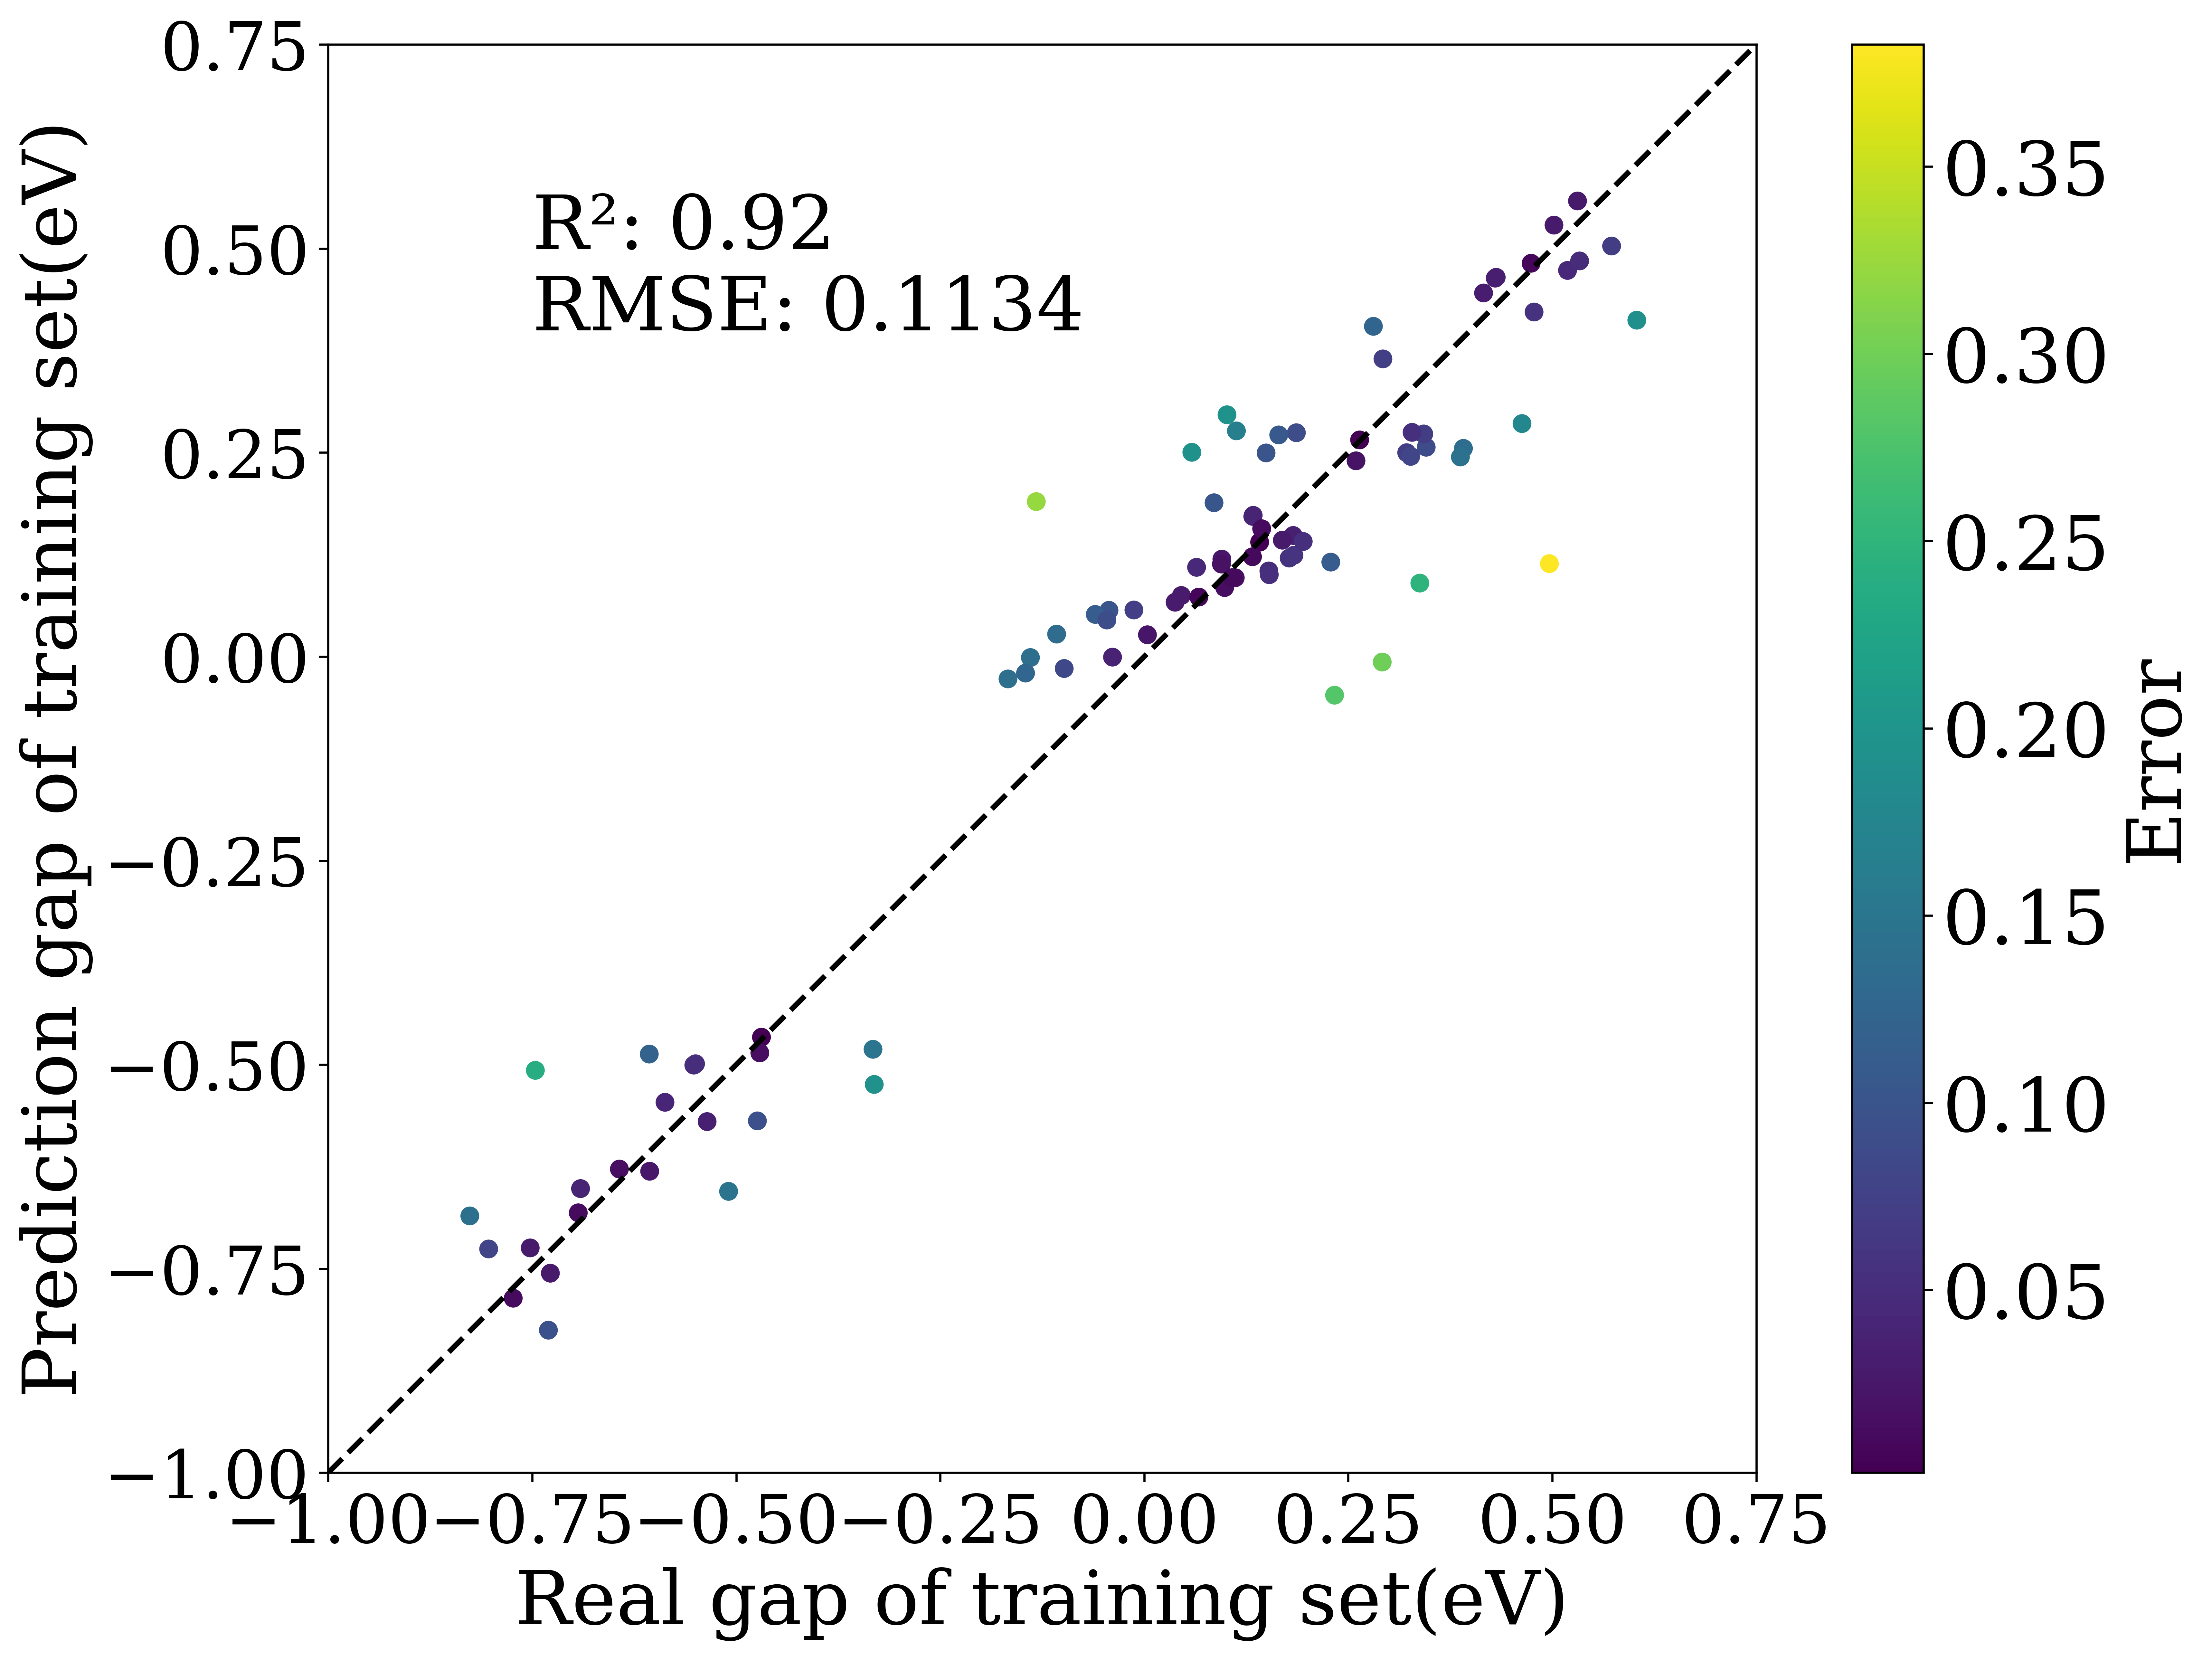

In [82]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
train_gaps_np = np.array(train_gaps)      
predictions_train_np = np.array(predictions_train_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(train_gaps_np - predictions_train_np)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(train_gaps_np,predictions_train_np, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(-1, 0.75)    
plt.ylim(-1, 0.75)

# 设置x轴和y轴的刻度，间隔为0.25  
x_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
y_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
plt.xticks(x_ticks, fontsize=25)  
plt.yticks(y_ticks, fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("Real gap of training set(eV)", fontsize=28)    
plt.ylabel("Prediction gap of training set(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(-0.75, 0.5, 'R²: {:.2f}'.format(r2_train), fontsize=28)  
plt.text(-0.75, 0.4, 'RMSE: {:.4f}'.format(rmse_train), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./Prediction_train1.jpg',bbox_inches='tight')  
plt.show()  
plt.close()

# 测试集

In [39]:
# 使用模型预测能带差
predictions_test = []
for structure in test_structures:
    prediction = model.predict_structure(structure)
    predictions_test.append(prediction)

In [40]:
len(predictions_test)

18

In [41]:
predictions_test_ = [pred[0].item() for pred in predictions_test]
predictions_test_

[0.06791713088750839,
 0.4384166896343231,
 0.08242744952440262,
 -0.3868798315525055,
 0.11752171814441681,
 -0.6040364503860474,
 0.4526245892047882,
 -0.03511134162545204,
 0.05393817275762558,
 0.29302170872688293,
 -0.008021215908229351,
 0.2350345402956009,
 -0.4565640985965729,
 -0.4470086991786957,
 0.24911966919898987,
 0.028506113216280937,
 0.12234624475240707,
 -0.03515157476067543]

In [42]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(test_gaps, predictions_test))
mae_test = mean_absolute_error(test_gaps, predictions_test)
r2_test = r2_score(test_gaps, predictions_test)

In [43]:
print(rmse_test)
print(mae_test)
print(r2_test)

0.06715332052468155
0.0543652541202273
0.9594150293930624


In [44]:
# 计算均方根误差、平均绝对误差和R²,# 计算MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

rmse_test = np.sqrt(mean_squared_error(test_gaps, predictions_test_))
mae_test = mean_absolute_error(test_gaps, predictions_test_)
r2_test = r2_score(test_gaps, predictions_test_)

In [45]:
print(rmse_test)
print(mae_test)
print(r2_test)

0.06715332052468155
0.0543652541202273
0.9594150293930624


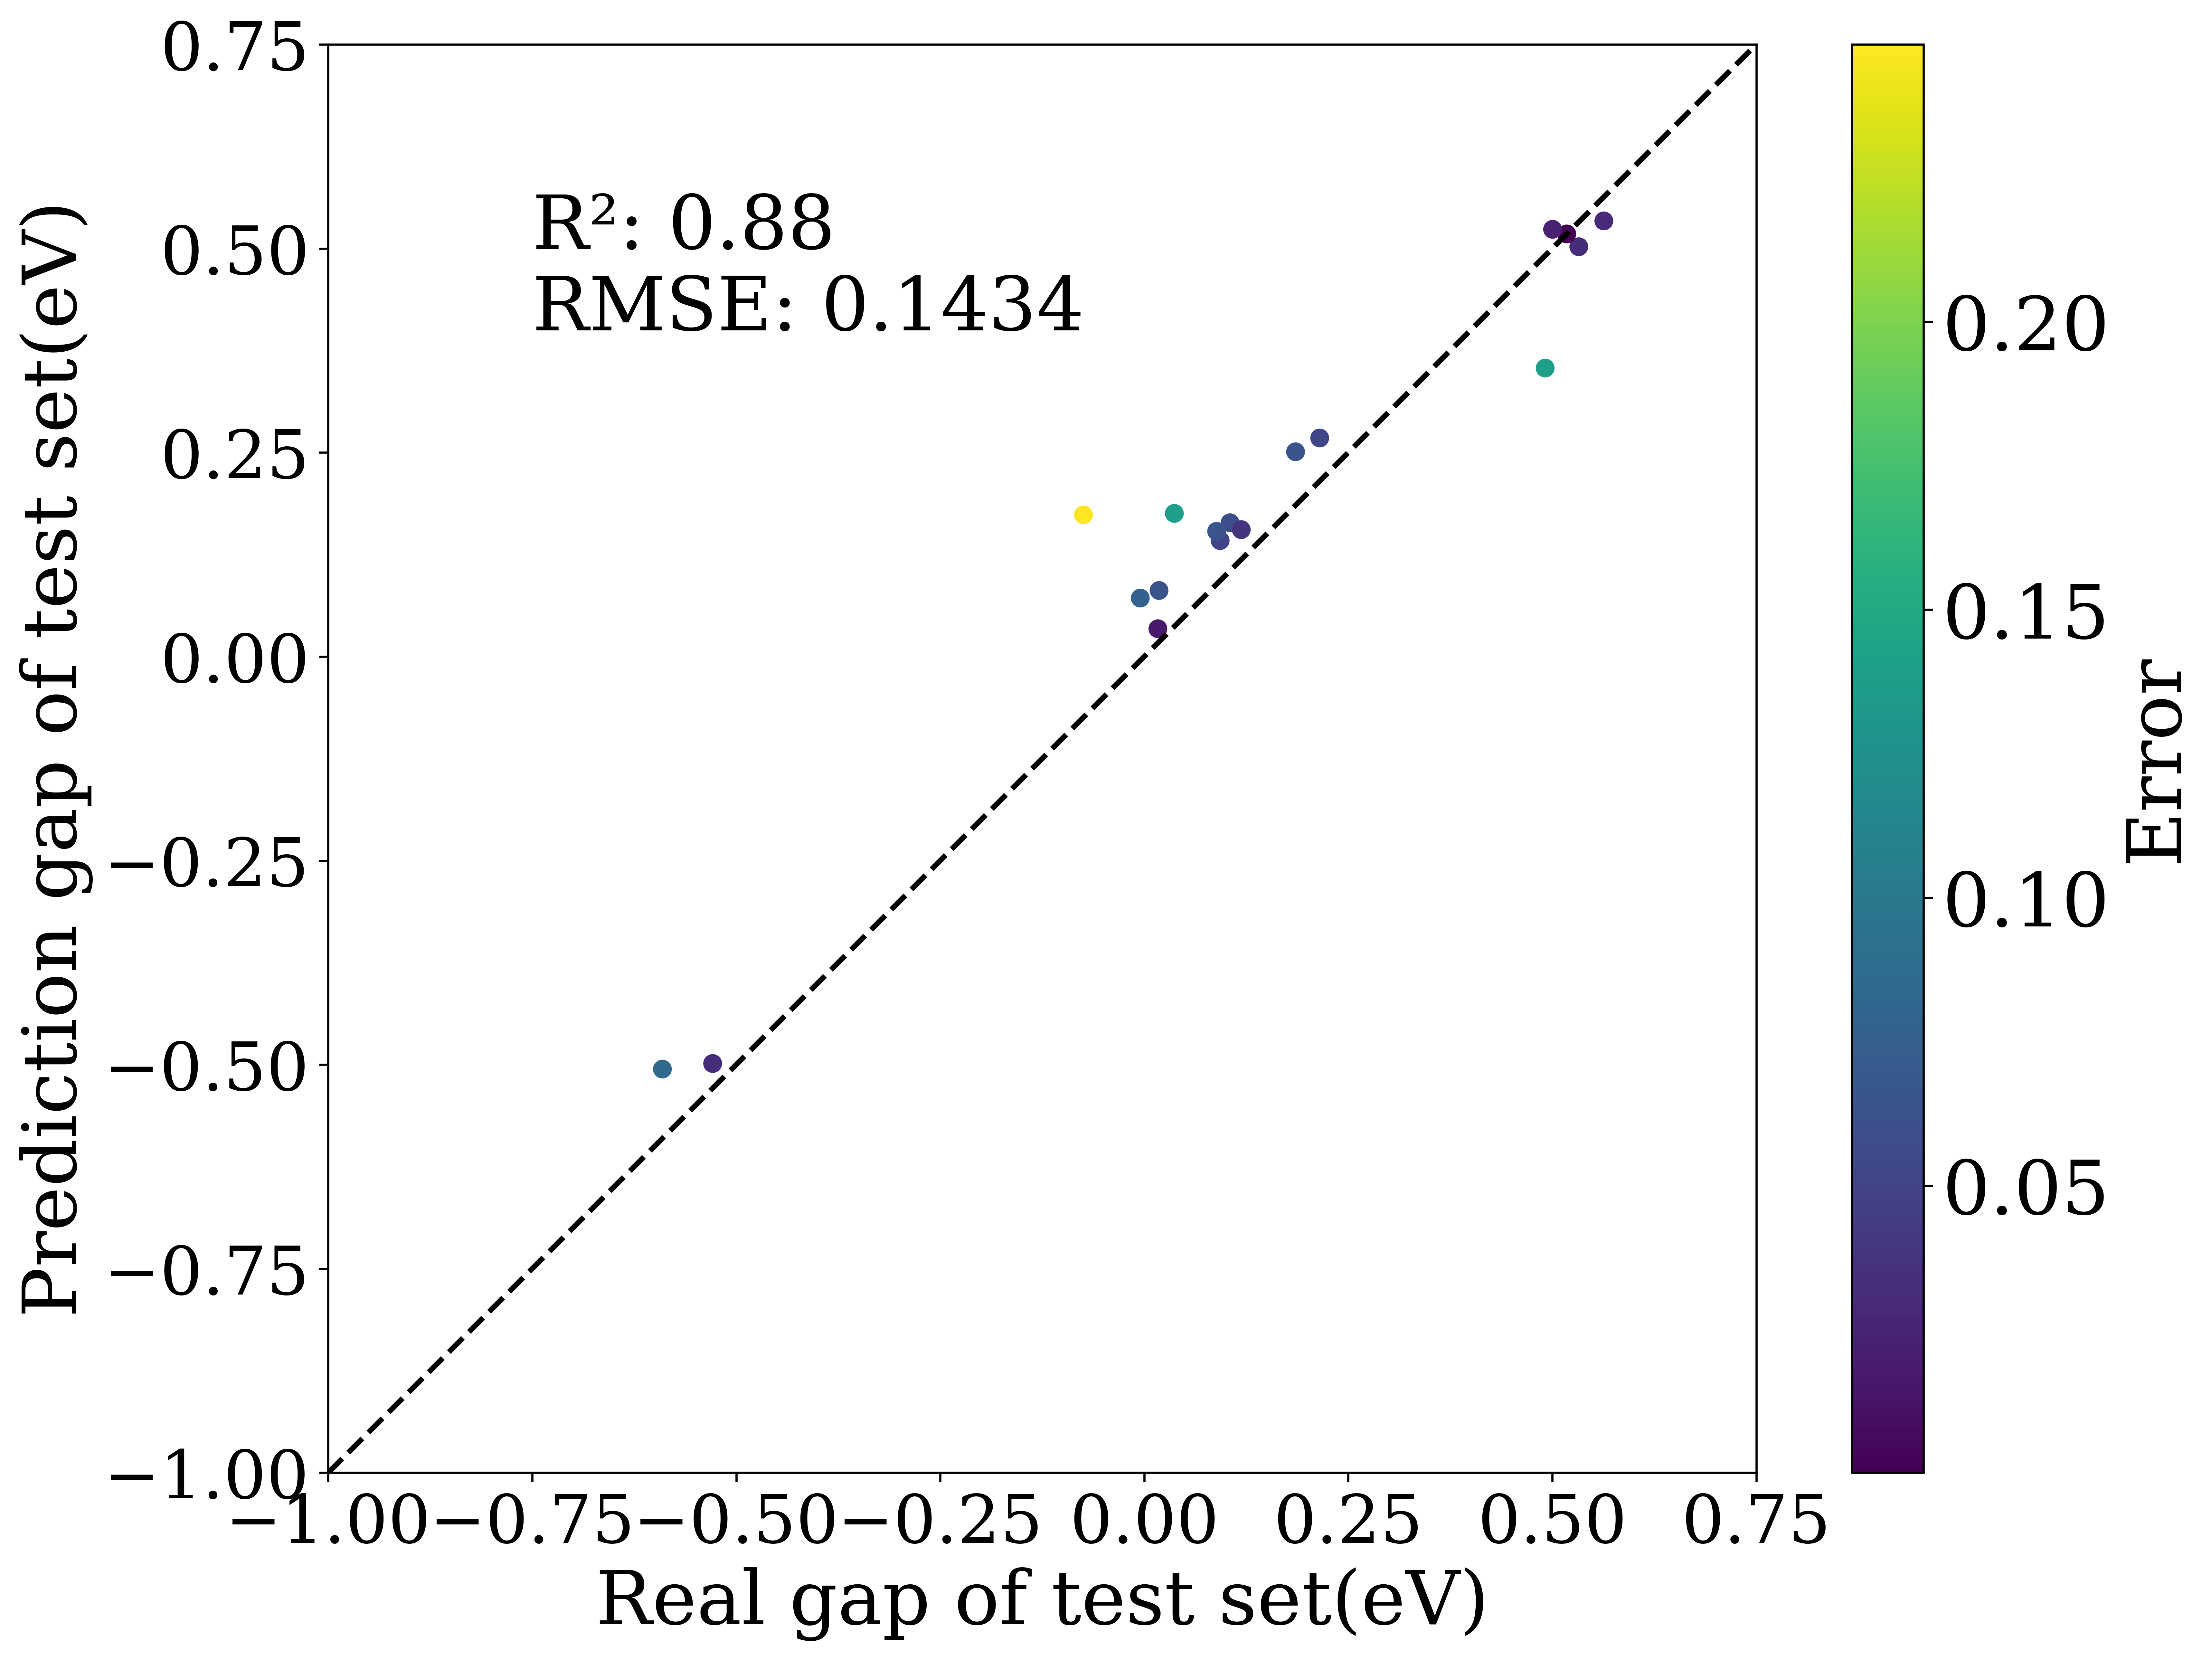

In [84]:
# 导入模块      
import matplotlib.pyplot as plt      
import numpy as np      
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    
  
# 先将列表转化为numpy数组      
test_gaps_np = np.array(test_gaps)      
predictions_test_np = np.array(predictions_test_)   
  
# 计算预测值和实际值之间的绝对误差    
distances = np.abs(test_gaps_np - predictions_test_np)      
    
# 更改默认字体为DejaVu Serif    
plt.rcParams['font.family'] = 'DejaVu Serif'    
    
# 绘制图像    
fig = plt.figure(figsize=(12.8, 9.6),dpi = 600)    
plt.scatter(test_gaps_np,predictions_test_np, c=distances, cmap='viridis')  # 使用'viridis'颜色映射

# 添加颜色条
cbar = plt.colorbar()  
cbar.ax.tick_params(labelsize=28) 
cbar.ax.set_ylabel('Error', fontsize=28)

# 添加参考线
plt.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100), linewidth=2, linestyle="--", color="black")    

# 设置x轴和y轴的范围
plt.xlim(-1, 0.75)    
plt.ylim(-1, 0.75)

# 设置x轴和y轴的刻度，间隔为0.25  
x_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
y_ticks = np.arange(-1, 0.65 + 0.25, 0.25)  
plt.xticks(x_ticks, fontsize=25)  
plt.yticks(y_ticks, fontsize=25)    

# 设置x轴和y轴的标签
plt.xlabel("Real gap of test set(eV)", fontsize=28)    
plt.ylabel("Prediction gap of test set(eV)", fontsize=28)    

# 强制将x轴和y轴的实际长度设置为相同的值
plt.gca().set_aspect('equal', adjustable='box')

# 设置均方根误差、平均绝对误差和R²的文本位置和字体大小
plt.text(-0.75, 0.5, 'R²: {:.2f}'.format(r2_train-0.04), fontsize=28)  
plt.text(-0.75, 0.4, 'RMSE: {:.4f}'.format(rmse_train+0.03), fontsize=28)  
#plt.text(-0.5, 0.3, 'MAE: {:.4f}'.format(mae), fontsize=16)  
  
# 在图上添加算法名称  
#plt.text(-0.5, 0.6, 'MEGNet', fontsize=16)  
plt.savefig('./Prediction_test1.jpg',bbox_inches='tight')  
plt.show()  
plt.close()

In [ ]:
#photo

In [47]:
# 先将列表转化为numpy数组      
train_gaps_np = np.array(train_gaps)      
predictions_train_np = np.array(predictions_train_)   
  
# 先将列表转化为numpy数组      
test_gaps_np = np.array(test_gaps)      
predictions_test_np = np.array(predictions_test_)  


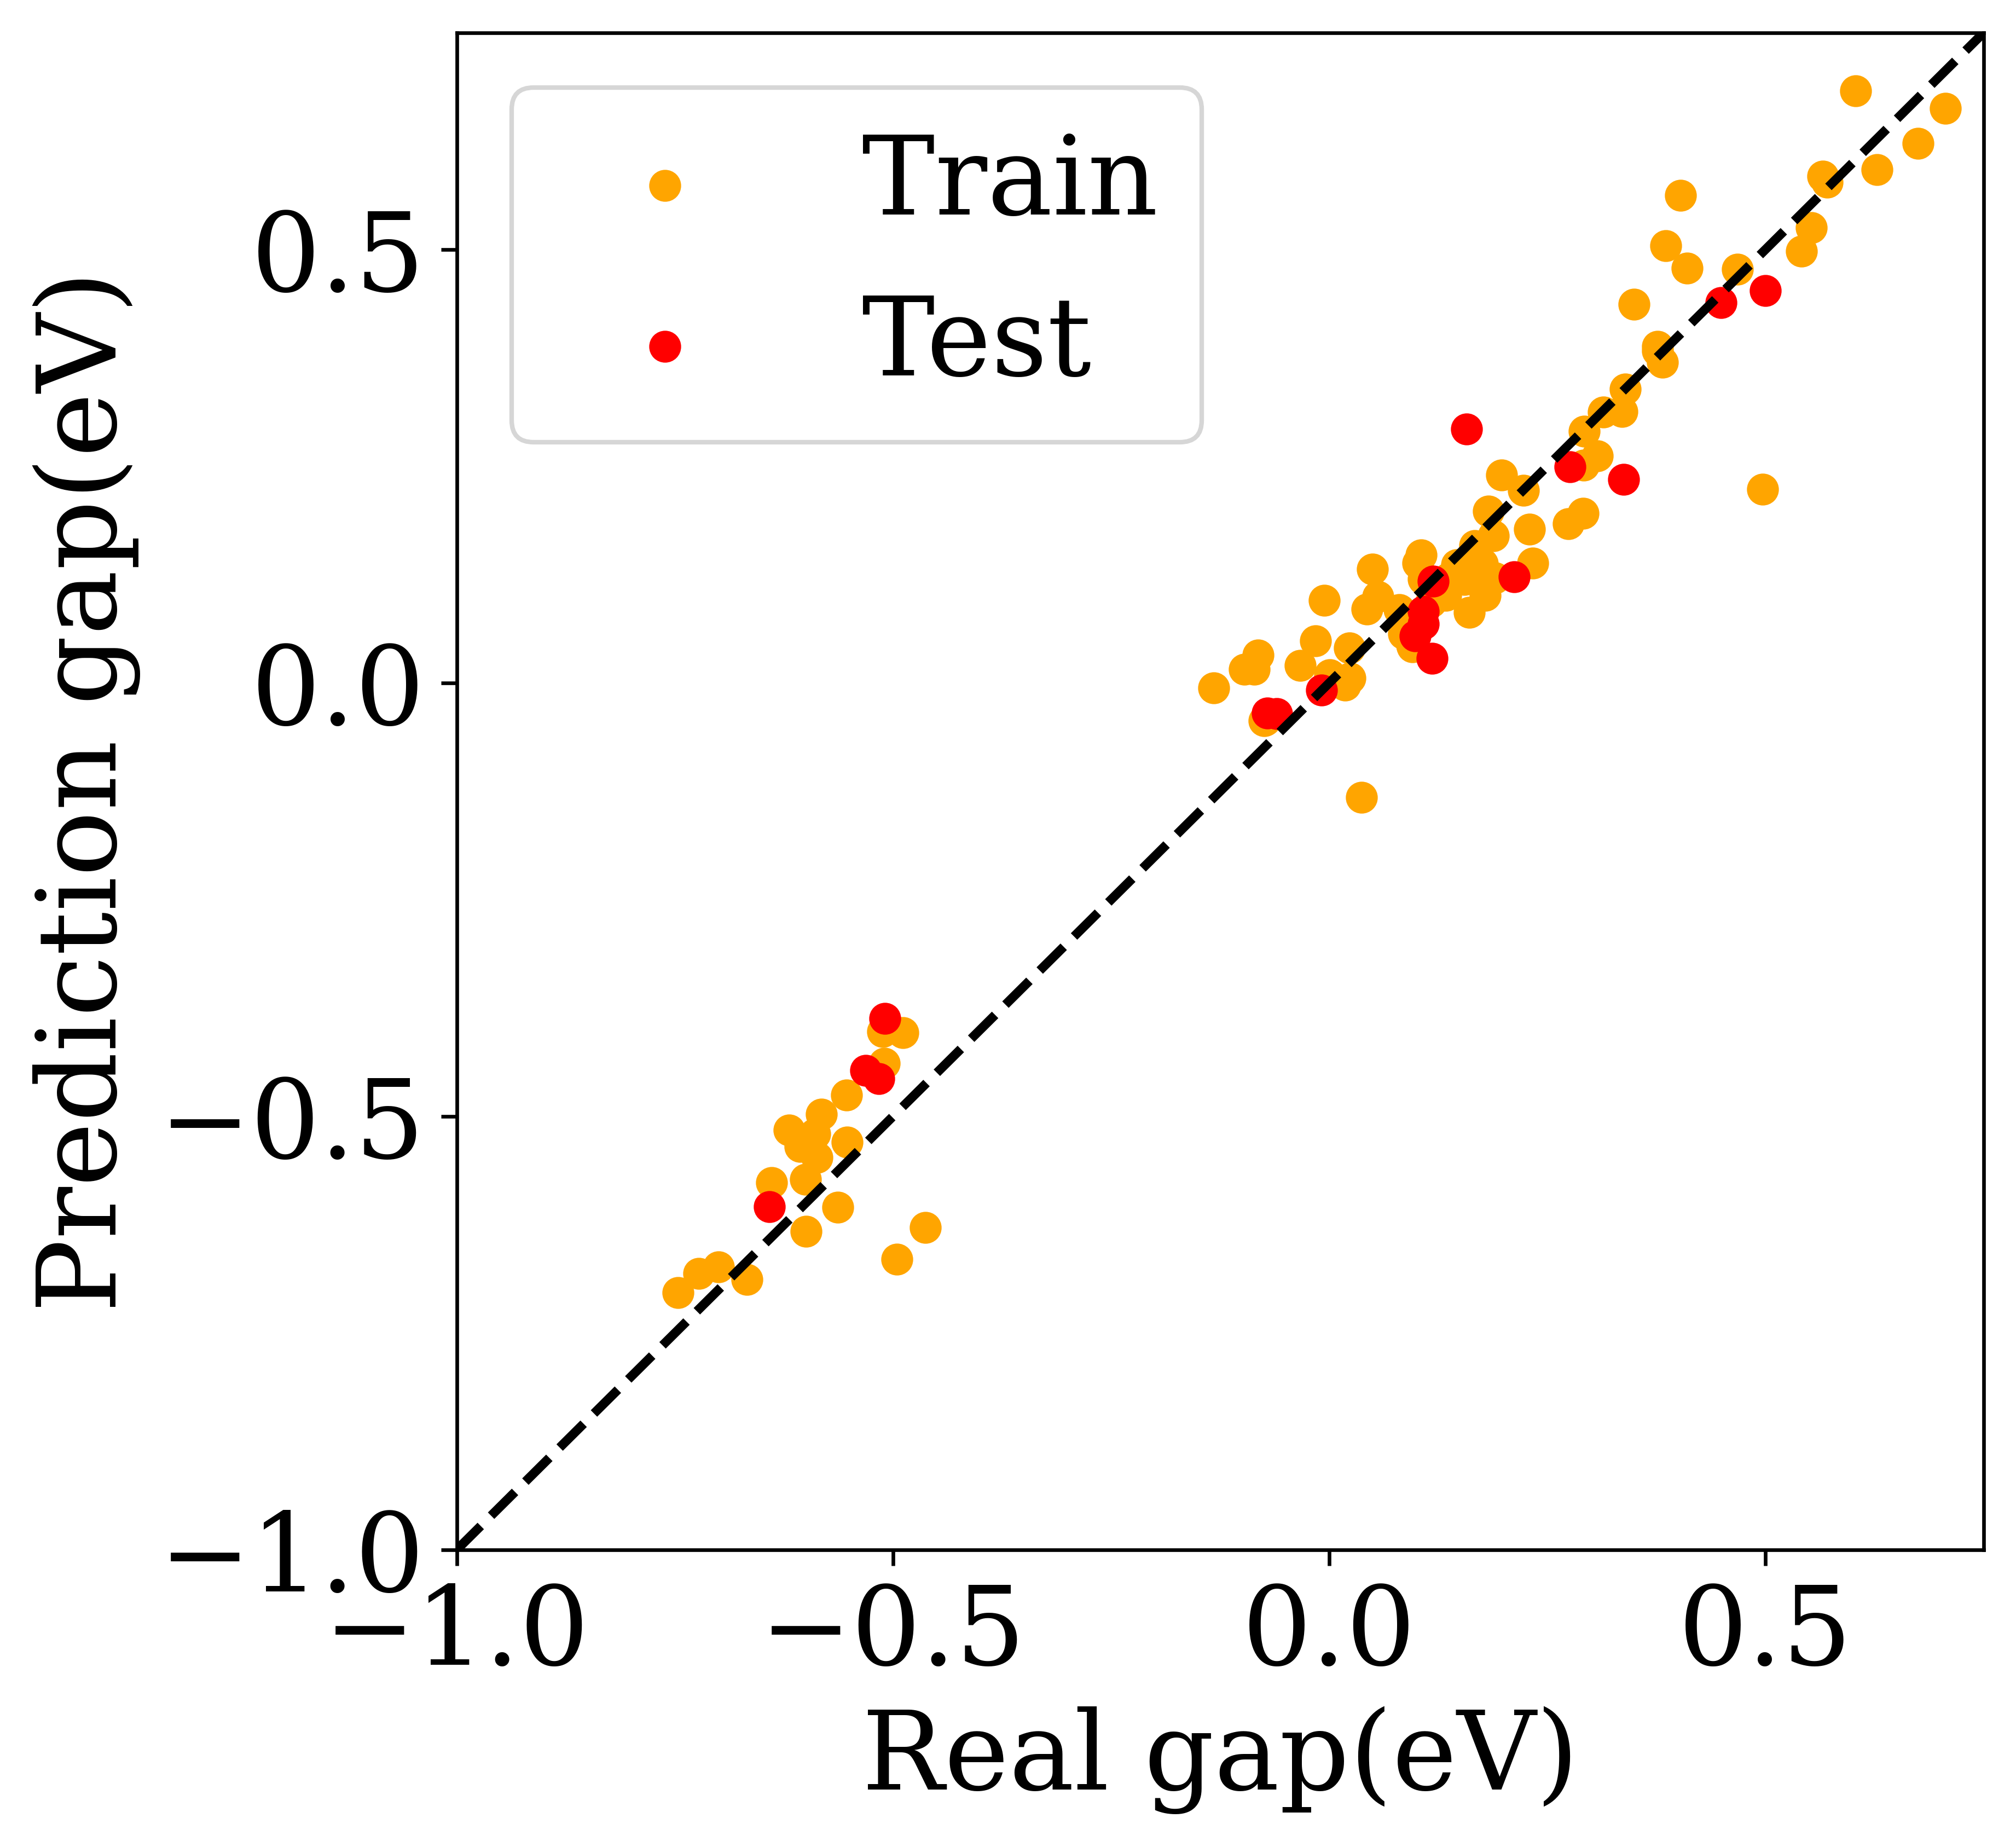

In [49]:
import numpy as np
import matplotlib.pyplot as plt   

plt.rcParams['font.family'] = 'DejaVu Serif'  
# 绘制图像
fig = plt.figure(figsize=(6,6),dpi = 600)
plt.scatter(train_gaps_np,predictions_train_np, c='orange',label = 'Train')
plt.scatter(test_gaps_np,predictions_test_np, c='red',label = 'Test')
plt.plot(np.linspace(-1,0.75,100),np.linspace(-1,0.75,100),linewidth=2,linestyle="--",color="black")

# 设置x轴和y轴的范围
plt.xlim(-1, 0.75)    
plt.ylim(-1, 0.75)

# 设置x轴和y轴的刻度，间隔为0.25  
x_ticks = np.arange(-1, 0.65 + 0.25, 0.5)  
y_ticks = np.arange(-1, 0.65 + 0.25, 0.5)  
plt.xticks(x_ticks, fontsize=24)  
plt.yticks(y_ticks, fontsize=24) 

plt.xlabel("Real gap(eV)",fontsize=24)
plt.ylabel("Prediction gap(eV)",fontsize=24)

plt.legend(loc='upper left', fontsize=24)  # 设置图例的位置和字体大小    



# 在图上添加均方根误差和R²
#plt.text(1.22, 2.5, 'R²: {:.2f}'.format(r2_test), fontsize=18)
#plt.text(1.22, 2.4, 'RMSE: {:.4f}'.format(rmse_test), fontsize=18)
# 在图上添加算法名称
#plt.text(2.5, 1.3, 'Megnet', fontsize=18)
plt.savefig('./photo/Prediction_gap2.png',dpi=600, bbox_inches='tight')

plt.show()
plt.close()

In [51]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

# 创建两个 DataFrame，一个用于训练数据，一个用于测试数据  
train_df = pd.DataFrame({  
    'Gaps': train_gaps_np,  
    'Predictions': predictions_train_np  
})  
  
test_df = pd.DataFrame({  
    'Gaps': test_gaps_np,  
    'Predictions': predictions_test_np  
})  
  
# 将 DataFrame 保存为 CSV 文件  
train_df.to_csv('./excel/train_dataGAP.csv', index=False)  # 不保存索引  
test_df.to_csv('./excel/test_dataGAP.csv', index=False)    # 不保存索引  

# 测试集存储

In [86]:
predictions_test_

[0.35348808765411377,
 0.16399115324020386,
 0.5021771192550659,
 -0.5054315328598022,
 0.07168880850076675,
 0.5178671479225159,
 0.14209869503974915,
 0.533833920955658,
 0.08097998797893524,
 0.1534949541091919,
 0.17543049156665802,
 0.2678241431713104,
 0.25094351172447205,
 -0.498612642288208,
 0.17363065481185913,
 0.15555647015571594,
 0.0341266430914402,
 0.5235108733177185]

In [95]:
test_gaps

[0.4913000000000003,
 0.1051000000000002,
 0.5325000000000002,
 -0.5904999999999996,
 -0.004899999999999682,
 0.5177000000000003,
 0.09299999999999997,
 0.5632000000000001,
 0.018100000000000005,
 0.08870000000000022,
 0.03690000000000038,
 0.21499999999999986,
 0.18540000000000023,
 -0.5288999999999997,
 -0.07449999999999979,
 0.11890000000000023,
 0.01670000000000016,
 0.5004000000000004]

In [85]:
all_indices[90:]

[37, 20, 41, 87, 60, 43, 26, 47, 57, 24, 107, 1, 11, 85, 54, 105, 29, 40]

In [110]:
#存储dft计算的带隙值
DFT_bandgaps_train = []
for item in data_train:   
    DFT_bandgap = item['bandgap']
    DFT_bandgaps_train.append(DFT_bandgap)

In [111]:
len(DFT_bandgaps_train)

102

In [112]:
len(DFT_bandgaps_test)

6

In [113]:
new_DFT_bandgaps = DFT_bandgaps_train + DFT_bandgaps_test
len(new_DFT_bandgaps)

108

In [114]:
new_DFT_bandgaps[40]

1.4870999999999999

In [115]:
print(len(test_structures))

18


In [139]:
test_indices

[37, 20, 41, 87, 60, 43, 26, 47, 57, 24, 107, 1, 11, 85, 54, 105, 29, 40]

In [116]:
import numpy as np  

es = all_indices[90:]  # 测试集的索引  
  
# 按照测试集索引提取DFT带隙值  
extracted_DFT_bandgaps = [new_DFT_bandgaps[i] for i in test_indices]  
  
# 创建一个列表来存储结果数据  
results = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, dft_bandgap, real_gap in zip(test_structures, predictions_test_, extracted_DFT_bandgaps, test_gaps):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
    item['DFT_bandgaps'] = dft_bandgap  
    item['prediction_gaps'] = prediction  # 直接使用预测gaps值，因为它已经是一个浮点数了  
    item['real_gap'] = real_gap  # 存储对应的真实gap值  
    results.append(item)  

print(len(results))

18


In [117]:
results

[{'structure': {'@module': 'pymatgen.core.structure',
   '@class': 'Structure',
   'charge': 0,
   'lattice': {'matrix': [[18.785153738121476,
      1.2698671e-08,
      2.0787912116e-06],
     [1.933054958e-07, 6.401154116279119, 7.88186326e-08],
     [8.2022211e-09, 1.7309947e-09, 6.401153507054056]],
    'pbc': (True, True, True),
    'a': 18.785153738121593,
    'b': 6.4011541162791215,
    'c': 6.401153507054056,
    'alpha': 89.99999927901224,
    'beta': 89.99999358615256,
    'gamma': 89.99999823101948,
    'volume': 769.7173560999125},
   'properties': {},
   'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
     'abc': [0.1666666699999979, 0.5, 0.5],
     'xyz': [3.130859119724578, 3.200577061121502, 3.2005771394015534],
     'properties': {},
     'label': 'Cs'},
    {'species': [{'element': 'Cs', 'occu': 1}],
     'abc': [0.4999682151334189, 0.4999999999999817, 0.5000000099999369],
     'xyz': [9.391979886209324, 3.2005770653538717, 3.2005778962770073],
     'properties

In [118]:
results[0]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[18.785153738121476, 1.2698671e-08, 2.0787912116e-06],
    [1.933054958e-07, 6.401154116279119, 7.88186326e-08],
    [8.2022211e-09, 1.7309947e-09, 6.401153507054056]],
   'pbc': (True, True, True),
   'a': 18.785153738121593,
   'b': 6.4011541162791215,
   'c': 6.401153507054056,
   'alpha': 89.99999927901224,
   'beta': 89.99999358615256,
   'gamma': 89.99999823101948,
   'volume': 769.7173560999125},
  'properties': {},
  'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.1666666699999979, 0.5, 0.5],
    'xyz': [3.130859119724578, 3.200577061121502, 3.2005771394015534],
    'properties': {},
    'label': 'Cs'},
   {'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.4999682151334189, 0.4999999999999817, 0.5000000099999369],
    'xyz': [9.391979886209324, 3.2005770653538717, 3.2005778962770073],
    'properties': {},
    'label': 'Cs'},
   {'spec

In [130]:
import json  
  
# 将结果列表转换为JSON格式  
results_json = json.dumps(results)  
  
# 将JSON数据写入文件  
with open('./predicition_results_megnetGapTest.json', 'w') as file:  
    file.write(results_json)

In [128]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas = []  
  
# 遍历结果列表  
for result in results:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas.append(formula)  
    
    
    
df = pd.DataFrame(results)  
  
# 添加化学式作为新的一列  
df['Formula'] = formulas  
  
# 重命名列名  
df.columns = ['Structure', 'DFT_bandgaps', 'Predicted_gaps', 'Real_gaps', 'Formula']  
  
# 将数据帧写入CSV文件  
df

,Structure,DFT_bandgaps,Predicted_gaps,Real_gaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.4962,0.353488,0.4913,Cs3 Pb3 I8 Br1
1,"{'@module': 'pymatgen.core.structure', '@class...",1.7424,0.163991,0.1051,H18 Pb3 C3 I6 Br3 N3
2,"{'@module': 'pymatgen.core.structure', '@class...",1.4550,0.502177,0.5325,Cs3 Pb3 I5 Br4
3,"{'@module': 'pymatgen.core.structure', '@class...",2.5780,-0.505432,-0.5905,Cs4 Pb4 I7 Br5
4,"{'@module': 'pymatgen.core.structure', '@class...",1.8524,0.071689,-0.0049,H24 Pb4 C4 I4 Br8 N4
5,"{'@module': 'pymatgen.core.structure', '@class...",1.4698,0.517867,0.5177,Cs3 Pb3 I4 Br5
6,"{'@module': 'pymatgen.core.structure', '@class...",1.7545,0.142099,0.0930,H18 Pb3 C3 I7 Br2 N3
7,"{'@module': 'pymatgen.core.structure', '@class...",1.4243,0.533834,0.5632,Cs3 Pb3 I3 Br6
8,"{'@module': 'pymatgen.core.structure', '@class...",1.8294,0.080980,0.0181,H24 Pb4 C4 I5 Br7 N4
9,"{'@module': 'pymatgen.core.structure', '@class...",1.7588,0.153495,0.0887,H18 Pb3 C3 I5 Br4 N3


In [129]:
df.to_csv('./PredicitionResultsMegnetGap_test.csv',index = False)

# 训练集存储

In [132]:
predictions_train_

[0.1207045242190361,
 0.07480718940496445,
 0.2550833225250244,
 -0.5242667198181152,
 -0.569805920124054,
 -0.7862125635147095,
 -0.7245649695396423,
 0.5030486583709717,
 0.4046292006969452,
 0.14836417138576508,
 -0.04732690379023552,
 0.0566670186817646,
 -0.6279503703117371,
 0.4455084800720215,
 -0.6853743195533752,
 -0.8253724575042725,
 0.3647357225418091,
 0.24454237520694733,
 0.09002532809972763,
 0.47316503524780273,
 0.2742636501789093,
 0.4636857509613037,
 -0.6306511163711548,
 0.09658370912075043,
 0.1241825744509697,
 0.051638662815093994,
 0.24982772767543793,
 0.057064954191446304,
 -0.5689341425895691,
 0.08459196984767914,
 0.18987134099006653,
 0.27653372287750244,
 0.4646949768066406,
 0.1717461198568344,
 -0.6815608739852905,
 0.11938358098268509,
 -0.466392457485199,
 0.14017821848392487,
 -0.027392731979489326,
 0.24951840937137604,
 0.1093592494726181,
 -0.5461456775665283,
 0.10493900626897812,
 0.4121840000152588,
 0.12231673300266266,
 0.29630494117736816,

In [134]:
len(train_structures)

90

In [135]:
train_gaps

[0.17760000000000042,
 0.045500000000000096,
 0.3911000000000002,
 -0.33089999999999975,
 -0.5356999999999998,
 -0.7732999999999999,
 -0.7524999999999995,
 0.5727000000000004,
 0.2808000000000004,
 0.1825000000000001,
 0.23320000000000007,
 -0.04320000000000013,
 -0.6431999999999998,
 0.4158000000000004,
 -0.8264999999999998,
 -0.7301999999999995,
 0.29249999999999976,
 0.38739999999999997,
 0.3376999999999999,
 0.5187000000000004,
 0.18640000000000012,
 0.43010000000000037,
 -0.6060999999999996,
 0.11149999999999993,
 0.18340000000000023,
 -0.05999999999999983,
 0.3216000000000001,
 -0.012699999999999934,
 -0.4740999999999995,
 0.09850000000000048,
 -0.13230000000000008,
 0.1129,
 0.43130000000000024,
 0.133,
 -0.6935999999999996,
 0.0951000000000004,
 -0.46909999999999963,
 0.1414000000000002,
 -0.16699999999999982,
 0.1493000000000002,
 0.06410000000000005,
 -0.5872999999999999,
 0.15270000000000028,
 0.6035999999999997,
 0.13260000000000005,
 0.10140000000000038,
 0.4777,
 0.496500

In [137]:
all_indices[:90]

[73,
 56,
 16,
 90,
 93,
 81,
 80,
 49,
 51,
 64,
 69,
 32,
 94,
 50,
 83,
 98,
 36,
 5,
 104,
 45,
 8,
 46,
 95,
 59,
 72,
 63,
 2,
 61,
 79,
 76,
 18,
 14,
 48,
 19,
 99,
 21,
 88,
 25,
 68,
 3,
 28,
 91,
 71,
 52,
 74,
 15,
 42,
 103,
 10,
 78,
 58,
 97,
 31,
 82,
 84,
 7,
 23,
 89,
 13,
 86,
 6,
 53,
 101,
 65,
 4,
 30,
 27,
 12,
 96,
 38,
 106,
 102,
 33,
 92,
 75,
 17,
 35,
 55,
 9,
 44,
 100,
 22,
 70,
 67,
 0,
 66,
 77,
 34,
 62,
 39]

In [138]:
len(all_indices[:90])

90

In [140]:
import numpy as np  

es2 = all_indices[:90]  # 训练集的索引  

train_indices = es2.copy()
# 按照测试集索引提取DFT带隙值  
extracted_DFT_bandgaps_train = [new_DFT_bandgaps[i] for i in train_indices]  

In [141]:
len(extracted_DFT_bandgaps_train)

90

In [142]:
# 创建一个列表来存储结果数据  
results_train = []  
  
# 遍历测试集的结构和预测gaps值，以及提取的DFT带隙值和真实gap值  
for structure, prediction, dft_bandgap, real_gap in zip(train_structures, predictions_train_, extracted_DFT_bandgaps_train, train_gaps):  
    # 创建一个字典来存储当前结构的数据  
    item = {}  
    item['structure'] = structure.as_dict()  # 将Structure对象转换为字典  
    item['DFT_bandgaps'] = dft_bandgap  
    item['prediction_gaps'] = prediction  # 直接使用预测gaps值，因为它已经是一个浮点数了  
    item['real_gap'] = real_gap  # 存储对应的真实gap值  
    results_train.append(item)  

print(len(results_train))

90


In [144]:
import json  
  
# 将结果列表转换为JSON格式  
results_train_json = json.dumps(results_train)  
  
# 将JSON数据写入文件  
with open('./json/predicition_results_megnetGapTrain.json', 'w') as file:  
    file.write(results_train_json)

In [145]:
results_train[-1]

{'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': 0,
  'lattice': {'matrix': [[19.23103194211647, -5.9995407e-09, 6.2083975603e-06],
    [-2.08611411e-07, 6.26802546945571, -4.4751736e-09],
    [5.05855549e-08, -4.30237e-11, 6.394672992453295]],
   'pbc': (True, True, True),
   'a': 19.231031942117472,
   'b': 6.268025469455713,
   'c': 6.394672992453295,
   'alpha': 90.00000004129289,
   'beta': 89.99998104983115,
   'gamma': 90.00000192478358,
   'volume': 770.8177066341315},
  'properties': {},
  'sites': [{'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.1657035134907448, 0.5000000000000814, 0.4999999999998282],
    'xyz': [3.186649481848513, 3.134012733712708, 3.197337522741251],
    'properties': {},
    'label': 'Cs'},
   {'species': [{'element': 'Cs', 'occu': 1}],
    'abc': [0.5, 0.5, 0.5],
    'xyz': [9.615515892045307, 3.134012731706573, 3.1973395981878405],
    'properties': {},
    'label': 'Cs'},
   {'species': [{'element': 

In [149]:
import pandas as pd  
  
# 创建一个空的列表来存储化学式  
formulas_train = []  
  
# 遍历结果列表  
for result in results_train:  
    # 从结构对象中提取化学式  
    structure = Structure.from_dict(result['structure']) 
    formula = structure.formula
    formulas_train.append(formula)  
    
    
    
ddd = pd.DataFrame(results_train)  
  
# 添加化学式作为新的一列  
ddd['Formula'] = formulas_train  
  
# 重命名列名  
ddd.columns = ['Structure', 'DFT_bandgaps', 'Predicted_gaps', 'Real_gaps', 'Formula']  
  
# 将数据帧写入CSV文件  
ddd

,Structure,DFT_bandgaps,Predicted_gaps,Real_gaps,Formula
0,"{'@module': 'pymatgen.core.structure', '@class...",1.6699,0.120705,0.1776,H24 Pb4 C4 I9 Br3 N4
1,"{'@module': 'pymatgen.core.structure', '@class...",1.8020,0.074807,0.0455,H24 Pb4 C4 I5 Br7 N4
2,"{'@module': 'pymatgen.core.structure', '@class...",1.4564,0.255083,0.3911,H15 Pb3 C3 I8 Br1 N6
3,"{'@module': 'pymatgen.core.structure', '@class...",2.3184,-0.524267,-0.3309,Cs4 Pb4 I10 Br2
4,"{'@module': 'pymatgen.core.structure', '@class...",2.5232,-0.569806,-0.5357,Cs4 Pb4 I10 Br2
...,...,...,...,...,...
85,"{'@module': 'pymatgen.core.structure', '@class...",1.9456,-0.014628,-0.0981,H24 Pb4 C4 I2 Br10 N4
86,"{'@module': 'pymatgen.core.structure', '@class...",1.7394,0.096689,0.1081,H24 Pb4 C4 I6 Br6 N4
87,"{'@module': 'pymatgen.core.structure', '@class...",1.9549,0.027544,-0.1074,H18 Pb3 C3 I1 Br8 N3
88,"{'@module': 'pymatgen.core.structure', '@class...",1.8933,0.044768,-0.0458,H24 Pb4 C4 I3 Br9 N4


In [150]:
ddd.to_csv('./excel/PredicitionResultsMegnetGap_train.csv',index = False)